In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
columns=['user_id','item_id','rating','timestamp']
data=pd.read_csv('Movie\mov1\data.txt',sep='\t',names=columns)

In [10]:
data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [11]:
movie_titles=pd.read_csv('Movie\mov1\MOvie_Id_Titles.txt')

In [12]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [14]:
data=data.merge(movie_titles, on='item_id')

In [36]:
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [56]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [57]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [134]:
ratings=pd.DataFrame(data.groupby('title')['rating'].mean())

In [135]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [68]:
ratings['rate_count']=pd.DataFrame(data.groupby('title')['rating'].count())

In [69]:
ratings.head()

,rating,rate_count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [106]:
ratings.sort_values('rate_count',ascending=False).head(15)

,rating,rate_count
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


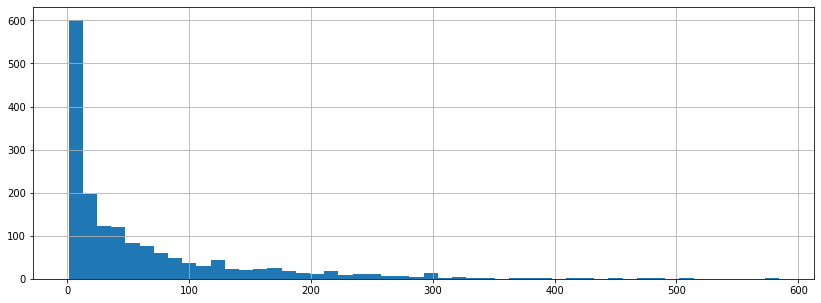

In [88]:
plt.figure(figsize=(14,5))
ratings['rate_count'].hist(bins=50)

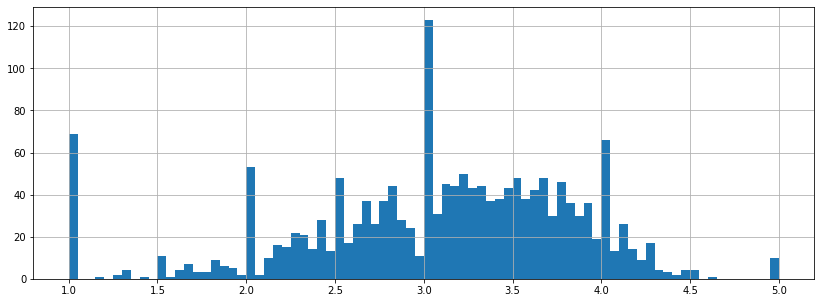

In [90]:
plt.figure(figsize=(14,5))
ratings['rating'].hist(bins=80)

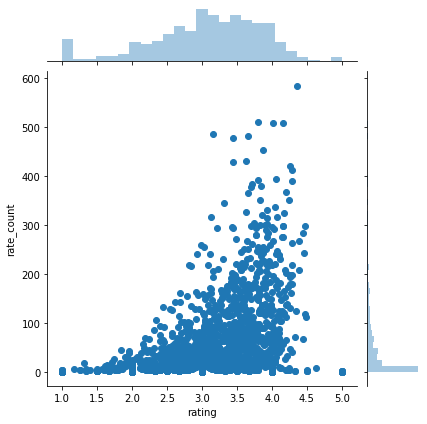

In [99]:
sb.jointplot(x='rating',y='rate_count',data=ratings,alpha =1)

In [102]:
movie_pivot=data.pivot_table(index='user_id',columns='title',values='rating')
movie_pivot.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
SilenceOfTheLambs_ratings = movie_pivot['Silence of the Lambs, The (1991)']

In [115]:
SilenceOfTheLambs_ratings.head()

user_id
0    NaN
1    4.0
2    NaN
3    NaN
4    NaN
Name: Silence of the Lambs, The (1991), dtype: float64

In [116]:
same_as_slb=movie_pivot.corrwith(SilenceOfTheLambs_ratings)

C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\HP\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [126]:
correlation_slb=pd.DataFrame(same_as_slb,columns=['correlation'])
correlation_slb.dropna(inplace =True)
correlation_slb.head(10)

,correlation
title,
'Til There Was You (1997),0.000000
1-900 (1994),-0.188982
101 Dalmatians (1996),0.030939
12 Angry Men (1957),0.127202
187 (1997),0.694740
2 Days in the Valley (1996),0.296968
"20,000 Leagues Under the Sea (1954)",0.075414
2001: A Space Odyssey (1968),0.083431
"39 Steps, The (1935)",0.514103


In [128]:
correlation_slb.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Mrs. Dalloway (1997),1.0
Spirits of the Dead (Tre passi nel delirio) (1968),1.0
Year of the Horse (1997),1.0
"Cement Garden, The (1993)",1.0
"Journey of August King, The (1995)",1.0
"Jerky Boys, The (1994)",1.0
Infinity (1996),1.0
"Smile Like Yours, A (1997)",1.0
"Savage Nights (Nuits fauves, Les) (1992)",1.0


In [129]:
correlation_slb=correlation_slb.join(ratings['rate_count'])

In [130]:
correlation_slb.head()

,correlation,rate_count
title,,
'Til There Was You (1997),0.000000,9
1-900 (1994),-0.188982,5
101 Dalmatians (1996),0.030939,109
12 Angry Men (1957),0.127202,125
187 (1997),0.694740,41


In [131]:
correlation_slb[correlation_slb['rate_count']>100].sort_values('correlation',ascending=False).head(10)

,correlation,rate_count
title,,
"Silence of the Lambs, The (1991)",1.000000,390
Alien: Resurrection (1997),0.408675,124
Basic Instinct (1992),0.403709,101
"Crying Game, The (1992)",0.370926,119
Shine (1996),0.368361,129
Dave (1993),0.358544,180
"Long Kiss Goodnight, The (1996)",0.353039,185
"Boot, Das (1981)",0.351619,201
M*A*S*H (1970),0.335937,206
